In [2]:
# 可以开始导入包
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [3]:
# 导入数据集
digits = load_digits()
x_data_all = digits.data
y_data_all  = digits.target
print(x_data_all.shape)
print(y_data_all.shape)

(1797, 64)
(1797,)


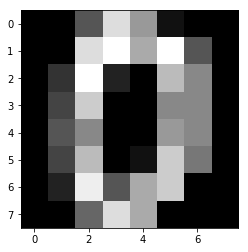

In [4]:
def show_single_img(img_arr):
    plt.imshow(img_arr, cmap='gray')
    plt.show()
show_single_img(digits.images[0])

In [5]:
# 划分数据集
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data_all, y_data_all, random_state=7)
# 划分验证集
x_train, x_valid, y_train,y_valid = train_test_split(
        x_train_all, y_train_all, random_state = 11
)
print(x_train.shape,y_train.shape)
print(x_valid.shape, y_valid.shape)

(1010, 64) (1010,)
(337, 64) (337,)


In [6]:
# 归一化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [7]:
# 定义网络结构
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape = x_train.shape[1:]))
# 深层的网络结构
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = 'relu'))
# 设置dropout
              
model.add(keras.layers.AlphaDropout(rate = 0.5))
# 定义最后一层
model.add(keras.layers.Dense(10, activation = 'softmax'))
# 定义目标函数
model.compile(loss = "sparse_categorical_crossentropy", optimizer =  "sgd",metrics = ["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                1950      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

In [9]:
history = model.fit(x_train_scaled, y_train, epochs = 100,
                   validation_data= (x_valid_scaled , y_valid))

Train on 1010 samples, validate on 337 samples
Epoch 1/100
1010/1010 [==============================] - 4s 4ms/sample - loss: 2.7469 - accuracy: 0.1109 - val_loss: 2.3026 - val_accuracy: 0.1484
Epoch 2/100
1010/1010 [==============================] - 0s 222us/sample - loss: 2.7828 - accuracy: 0.0861 - val_loss: 2.3025 - val_accuracy: 0.1187
Epoch 3/100
1010/1010 [==============================] - 0s 211us/sample - loss: 2.7819 - accuracy: 0.1020 - val_loss: 2.3025 - val_accuracy: 0.1039
Epoch 4/100
1010/1010 [==============================] - 0s 227us/sample - loss: 2.6962 - accuracy: 0.1010 - val_loss: 2.3026 - val_accuracy: 0.0950
Epoch 5/100
1010/1010 [==============================] - 0s 218us/sample - loss: 2.6537 - accuracy: 0.1050 - val_loss: 2.3025 - val_accuracy: 0.1187
Epoch 6/100
1010/1010 [==============================] - 0s 212us/sample - loss: 2.7290 - accuracy: 0.0941 - val_loss: 2.3025 - val_accuracy: 0.1751
Epoch 7/100
1010/1010 [==============================] - 0s 2

1010/1010 [==============================] - 0s 220us/sample - loss: 2.3587 - accuracy: 0.1168 - val_loss: 2.3021 - val_accuracy: 0.1335
Epoch 56/100
1010/1010 [==============================] - 0s 214us/sample - loss: 2.3609 - accuracy: 0.0960 - val_loss: 2.3022 - val_accuracy: 0.1246
Epoch 57/100
1010/1010 [==============================] - 0s 216us/sample - loss: 2.3613 - accuracy: 0.1000 - val_loss: 2.3021 - val_accuracy: 0.1395
Epoch 58/100
1010/1010 [==============================] - 0s 218us/sample - loss: 2.3521 - accuracy: 0.1059 - val_loss: 2.3021 - val_accuracy: 0.1306
Epoch 59/100
1010/1010 [==============================] - 0s 214us/sample - loss: 2.3427 - accuracy: 0.1168 - val_loss: 2.3021 - val_accuracy: 0.1276
Epoch 60/100
1010/1010 [==============================] - 0s 208us/sample - loss: 2.3625 - accuracy: 0.1059 - val_loss: 2.3020 - val_accuracy: 0.1276
Epoch 61/100
1010/1010 [==============================] - 0s 207us/sample - loss: 2.3632 - accuracy: 0.0980 - val

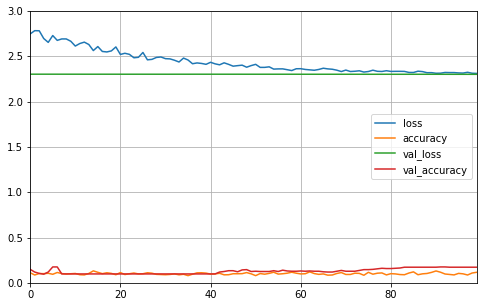

In [12]:
def plt_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
plt_learning_curve(history)